In [1]:
import os
import sys
import optparse
from environment import environment
from sumolib import checkBinary  # Checks for the binary in environ vars
import traci
from agent import agents
import matplotlib.pyplot as plt 

In [2]:
if 'SUMO_HOME' in os.environ:
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)
    print('added SUMO_HOME to tools directory')
else:
    sys.exit("please declare environment variable 'SUMO_HOME'")

print(os.environ['SUMO_HOME'])

added SUMO_HOME to tools directory
C:\Program Files (x86)\Eclipse\Sumo\


In [3]:
sumoBinaryNoGui = checkBinary('sumo')
sumoBinary = checkBinary('sumo-gui')

nogui = [sumoBinaryNoGui, "-c", "tmp.sumocfg", '--no-warnings']
gui = [sumoBinary, "-c", "tmp.sumocfg",
                           '--quit-on-end']

print(sumoBinaryNoGui)
print(sumoBinary)

C:\Program Files (x86)\Eclipse\Sumo\bin\sumo
C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui


In [4]:
def default_run():
    traci.start(gui)
    step = 0
    env = environment()
    traci.trafficlight.setPhase('0', 0)
    action = [0]
    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
        step += 1
    print('total waiting time of defaul cyclic traffic light', step)
    traci.close()

In [6]:
agent = None
env = None
# contains TraCI control loop
def run(episodes):
                             
    traci.start(nogui)
    env = environment()
    agent = agents(env.state_size(), env.action_size())
#     agent.load_policy('model.pt')
    traci.close()
    epsilon = 0.1
    ep = 0.
    while ep < episodes:
        ep+=1
        print(ep)
        epsilon = ep / (episodes - 1.1)

#         if (ep == episodes - 1):
#             traci.start(gui)
#         else: 
        traci.start(nogui)
        step = 0
        prev = env.getState()
        reward = env.reward()
        action = agent.select_actions(1 , prev)
        print(action)
        print(epsilon)
        while traci.simulation.getMinExpectedNumber() > 0 and step < 5e3:
            traci.simulationStep()
            env.do_action(action)
            env.cumulateWaitingTime()
            if (step % 20 == 0):
                state = env.getState()
                reward = env.reward()
#                 print('reward:', reward)
                agent.add_memmory(prev, action, state, reward)
                action = agent.select_actions(epsilon , state)
                
            agent.train()
            step += 1
        print(len(agent.mem))      
        if (step >= 5e3-1):
            print('fail to complete the episode')
        print(step)
        traci.close()
        
    agent.save_policy('model.pt')
    sys.stdout.flush()
    agent.plot()

In [6]:
default_run()

{'0': ['GGGGGgrrrrrrrrgGGGGgrrrrrrrGr', 'GGGGGgrrrrrrrrgGGGGgrrrrrrrrr', 'yyyyygrrrrrrrryyyyygrrrrrrrrr', 'rrrrrGrrrrrrrrrrrrrGrrrrrrrrr', 'rrrrryrrrrrrrrrrrrryrrrrrrrrr', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrG', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrr', 'rrrrrryyyyyyyyrrrrrryyyyyyyrr']}
{'0': {'11_1', '21_0', '41_2', '11_0', '11_3', '31_0', '21_4', '11_2', '41_3', ':0_w1_0', '31_1', '21_2', '31_3', '41_0', ':0_w2_0', '21_3', '21_1', '31_2', '41_1'}}
total waiting time of defaul cyclic traffic light 1335


{'0': ['GGGGGgrrrrrrrrgGGGGgrrrrrrrGr', 'GGGGGgrrrrrrrrgGGGGgrrrrrrrrr', 'yyyyygrrrrrrrryyyyygrrrrrrrrr', 'rrrrrGrrrrrrrrrrrrrGrrrrrrrrr', 'rrrrryrrrrrrrrrrrrryrrrrrrrrr', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrG', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrr', 'rrrrrryyyyyyyyrrrrrryyyyyyyrr']}
{'0': {'11_0', '31_0', '21_2', '11_3', ':0_w2_0', '11_1', '31_2', ':0_w1_0', '31_1', '21_3', '21_0', '41_3', '11_2', '41_0', '21_1', '41_2', '41_1', '21_4', '31_3'}}
device available:  cpu
1.0
[[4]]
0.052910052910052914
69
1377
2.0
[[4]]
0.10582010582010583


C:\Users\Mr.Son\anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([32, 32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


142
1455
3.0
[[6]]
0.15873015873015875
207
1299
4.0
[[6]]
0.21164021164021166
274
1327
5.0
[[6]]
0.2645502645502646
344
1385
6.0
[[6]]
0.3174603174603175
409
1294
7.0
[[6]]
0.3703703703703704
486
1528
8.0
[[6]]
0.4232804232804233
551
1293
9.0
[[0]]
0.4761904761904762
622
1408
10.0
[[0]]
0.5291005291005292
687
1293
11.0
[[6]]
0.5820105820105821
752
1298
12.0
[[6]]
0.634920634920635
817
1300
13.0
[[1]]
0.6878306878306879
886
1368
14.0
[[6]]
0.7407407407407408
951
1297
15.0
[[6]]
0.7936507936507937
1001
1296
16.0
[[1]]
0.8465608465608466
1001
1327
17.0
[[6]]
0.8994708994708995
1001
1418
18.0
[[1]]
0.9523809523809524
1001
1298
19.0
[[1]]
1.0052910052910053
1001
1332
20.0
[[6]]
1.0582010582010584
1001
1348


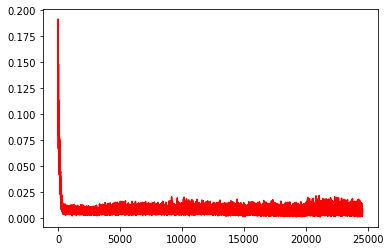

In [7]:
import traceback

try:
    run(episodes=20)
except Exception as e:
    traceback.print_exc()
    traci.close()


In [11]:
def demo():
    traci.start(gui)
    total_time = 0
    env = environment()
    agent = agents(env.state_size(), env.action_size())
    agent.load_policy('model.pt')
    step = 0
    prevPhase = 0
    action = [0]
    while traci.simulation.getMinExpectedNumber() > 0 and step < 5e3:
        traci.simulationStep()
        env.do_action(action)
        env.cumulateWaitingTime()
        step += 1
        if step % 50 == 0:
            state = env.getState()
            phase = env.getPhase()
            print(env.reward())

            action = agent.select_actions(1 , state, True)
            env.do_action(action)
            print('action: ', action)
    if (step >= 5e3-1):
        print('fail to complete the episode')
    print('total waiting time of rl traffic light', step)
    traci.close()

In [12]:
demo()

{'0': ['GGGGGgrrrrrrrrgGGGGgrrrrrrrGr', 'GGGGGgrrrrrrrrgGGGGgrrrrrrrrr', 'yyyyygrrrrrrrryyyyygrrrrrrrrr', 'rrrrrGrrrrrrrrrrrrrGrrrrrrrrr', 'rrrrryrrrrrrrrrrrrryrrrrrrrrr', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrG', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrr', 'rrrrrryyyyyyyyrrrrrryyyyyyyrr']}
{'0': {'11_0', '31_0', '21_2', '11_3', ':0_w2_0', '11_1', '31_2', ':0_w1_0', '31_1', '21_3', '21_0', '41_3', '11_2', '41_0', '21_1', '41_2', '41_1', '21_4', '31_3'}}
device available:  cpu
[[0.]]
tensor([[-0.0431, -0.0206, -0.1032, -0.1231, -0.1021, -0.0774, -0.0276, -0.1625]])
[[0.]]
1
tensor([[-0.0439, -0.0195, -0.1022, -0.1223, -0.1041, -0.0761, -0.0279, -0.1601]])
[[0.]]
tensor([[-0.0431, -0.0206, -0.1032, -0.1231, -0.1021, -0.0774, -0.0276, -0.1625]])
[[0.]]
tensor([[-0.0435, -0.0200, -0.1027, -0.1227, -0.1031, -0.0767, -0.0278, -0.1612]])
[[0.]]
tensor([[-0.0435, -0.0200, -0.1027, -0.1227, -0.1031, -0.0767, -0.0278, -0.1612]])
[[0.]]
tensor([[-0.0438, -0.0210, -0.1037, -0.1209, -0.1029, -0.0770, -0.0269, -0.1602]